In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from predicates import *

In [7]:
p1 = AtomPredicate(AtomRelation.NEAR, AtomObject.CUBE, AtomColor.RED, AtomObject.SPHERE, AtomColor.BLUE)
p2 = AtomPredicate(AtomRelation.ON, AtomObject.CUBE, AtomColor.RED, AtomObject.SPHERE, AtomColor.BLUE)

In [8]:
s = { p1 }

In [9]:
p2 in s

False

In [7]:
from training import create_dataset
import numpy as np

pybullet build time: May  8 2021 05:50:53


In [8]:
samples = create_dataset('data/test_dataset', 2, 64, 10, (256, 256))

Generating 2 * 64 = 128 samples


100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


In [1]:
import numpy as np
import tensorflow as tf
import os
from pathlib import Path

In [6]:
[x * y for x in range(10) if (y := 2*x)]

SyntaxError: invalid syntax (3786389786.py, line 1)

In [5]:
np.linalg.norm(np.array([-1.0, 1.0]))

1.4142135623730951

In [53]:
def _parse_files(f):        
        data = np.load(f.numpy())
        frames = data['frames']
        predicates = data['predicates']
        targets = data['targets']
        return frames, predicates, targets

def _process(f):
    frames, predicates, targets = tf.py_function(_parse_files, [f], [tf.float32, tf.float32, tf.float32])        
    return tf.data.Dataset.from_tensor_slices((
        (
            tf.repeat(frames, tf.shape(targets)[1], axis=0),        
            tf.reshape(predicates, (-1,  tf.shape(predicates)[-1]))
        ),
        tf.reshape(targets, (-1,  tf.shape(targets)[-1]))
    ))

def load_as_tf_dataset(path):    
    return tf.data.Dataset.list_files('data/test_dataset/*').flat_map(_process)    

In [54]:
ds = load_as_tf_dataset('data/test_dataset/*')
result = next(ds.as_numpy_iterator())
len([1.0 for i in ds.as_numpy_iterator()])

1408

In [55]:
result = next(ds.as_numpy_iterator())

In [32]:
len([1.0 for i in ds.as_numpy_iterator()])

1408

In [59]:
result[1].shape

(1,)

In [34]:
t.shape

NameError: name 't' is not defined

In [ ]:
i[1].shape[1]

11

In [ ]:
t2 = tf.repeat(t, i[1].shape[1], axis=0)

In [ ]:
t2.shape

TensorShape([704, 256, 256, 3])

In [ ]:
batch = np.load('data/test_dataset/_0.npz')

In [ ]:
frames = batch['frames']
predicates = batch['predicates']
targets = batch['targets']

In [ ]:
np.repeat(frames, targets.shape[1], axis=0).shape

(2688, 256, 256, 3)

In [52]:
next(tf.data.Dataset.from_tensor_slices(((np.arange(10), np.arange(-10, 0)), np.arange(10, 20))).as_numpy_iterator())

((0, -10), 10)

In [ ]:
np.arange(-10, 0)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [9]:
from datasets import EasyBaseline, GoalNetDataset

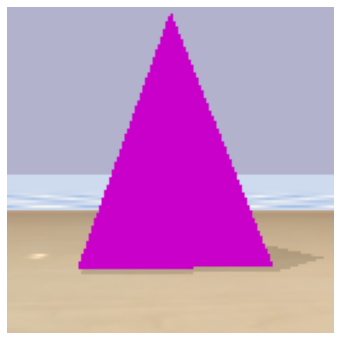

(purple pyramid on table) 1.0
(yellow pyramid on table) 0.0


In [8]:
from evaluation import evaluate_sample
evaluate_sample(EasyBaseline.sample)